# Primordial Element Formation, Primordial Magnetic Fields, and the Isotropy of the Universe by Thorne
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 26, 2021

There are three different models: open, Euclidean and semiclosed.  Here we calculate the field equations of the open model and will go back and do the other two later

"All attempts to understand how galactic magnetic fields could have 
arisen since the big bang creation of the universe face difficulties 
which seem to be insurmountable" ... . Section III 

http://adsabs.harvard.edu/full/1967ApJ...148...51T

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,theta,phi,z,dt,dtheta,dphi,dz = symbols( 't theta phi z dt dtheta dphi dz' ) 

In [4]:
A = Function('A')(t)
A

In [5]:
W = Function('W')(t)
W

In [6]:
variables = Matrix( [t,theta,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,dtheta,dphi,dz])
differentials

⎡  dt  ⎤
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎢ dphi ⎥
⎢      ⎥
⎣  dz  ⎦

In [8]:
lineElement = expand(dt**2 - A**2 * (dtheta**2 + sinh(theta)**2 * dphi**2 ) - W**2 * dz**2)
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡1    0            0           0   ⎤
⎢                                  ⎥
⎢     2                            ⎥
⎢0  -A (t)         0           0   ⎥
⎢                                  ⎥
⎢             2        2           ⎥
⎢0    0     -A (t)⋅sinh (θ)    0   ⎥
⎢                                  ⎥
⎢                              2   ⎥
⎣0    0            0         -W (t)⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡1    0            0           0   ⎤
⎢                                  ⎥
⎢     2                            ⎥
⎢0  -A (t)         0           0   ⎥
⎢                                  ⎥
⎢             2        2           ⎥
⎢0    0     -A (t)⋅sinh (θ)    0   ⎥
⎢                                  ⎥
⎢                              2   ⎥
⎣0    0            0         -W (t)⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t theta phi z")
t,theta,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢                                                           ⎡          d                    
⎢⎡0        0                  0                   0      ⎤  ⎢          ──(A(t))             
⎢⎢                                                       ⎥  ⎢          dt                   
⎢⎢        d                                              ⎥  ⎢   0      ────────         0   
⎢⎢0  A(t)⋅──(A(t))            0                   0      ⎥  ⎢            A(t)               
⎢⎢        dt                                             ⎥  ⎢                               
⎢⎢                                                       ⎥  ⎢d                              
⎢⎢                           2    d                      ⎥  ⎢──(A(t))                       
⎢⎢0        0        A(t)⋅sinh (θ)⋅──(A(t))        0      ⎥  ⎢dt                             
⎢⎢                                dt                     ⎥  ⎢──────── 

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡    2             2                                                                        
⎢   d             d                                                                         
⎢  ───(W(t))   2⋅───(A(t))                                                                  
⎢    2             2                                                                        
⎢  dt            dt                                                                         
⎢- ───────── - ───────────                              0                                   
⎢     W(t)         A(t)                                                                     
⎢                                                                                           
⎢                                                 d        d                                
⎢                                  2         A(t)⋅──(A(t))⋅──(W(t))             2           
⎢                                 d               dt       dt         

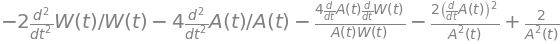

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                      2                                                    
⎢    d        d              ⎛d       ⎞                                                     
⎢2.0⋅──(A(t))⋅──(W(t))   1.0⋅⎜──(A(t))⎟                                                     
⎢    dt       dt             ⎝dt      ⎠      1                                              
⎢───────────────────── + ─────────────── - ─────                                            
⎢      A(t)⋅W(t)               2            2                                               
⎢                             A (t)        A (t)                                            
⎢                                                                                           
⎢                                                     ⎛      2             2                
⎢                                                     ⎜     d             d                 
⎢                                                     ⎜  2⋅───(W(t))  

In [19]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                        ⎡                        2            ⎤            
⎢                                        ⎢                       d             ⎥            
⎢                                        ⎢       0         A(t)⋅───(A(t))  0  0⎥            
⎢                                        ⎢                        2            ⎥            
⎢         ⎡0  0  0  0⎤                   ⎢                      dt             ⎥            
⎢         ⎢          ⎥                   ⎢                                     ⎥            
⎢         ⎢0  0  0  0⎥                   ⎢        2                            ⎥            
⎢         ⎢          ⎥                   ⎢       d                             ⎥            
⎢         ⎢0  0  0  0⎥                   ⎢-A(t)⋅───(A(t))        0         0  0⎥            
⎢         ⎢          ⎥                   ⎢        2                            ⎥            
⎢         ⎣0  0  0  0⎦                   ⎢      dt                    

In [20]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

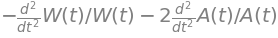

In [21]:
Ric.tensor()[0,0]

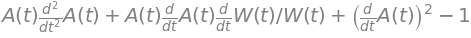

In [22]:
Ric.tensor()[1,1]

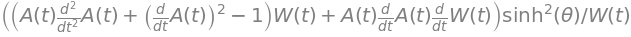

In [23]:
Ric.tensor()[2,2]

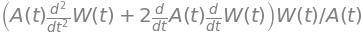

In [24]:
Ric.tensor()[3,3]

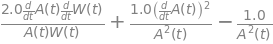

In [25]:
einst.tensor()[0,0]

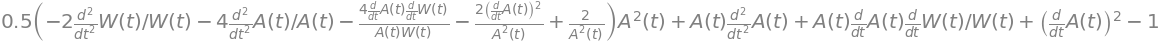

In [26]:
einst.tensor()[1,1]

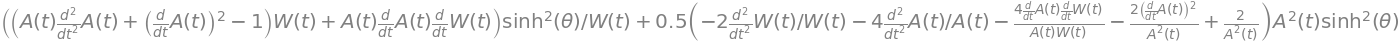

In [27]:
einst.tensor()[2,2]

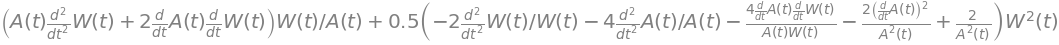

In [28]:
einst.tensor()[3,3]

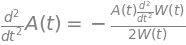

In [31]:
Eq(diff(A,t,t),solve( Ric.tensor()[0,0], diff(A,t,t) )[0])

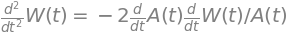

In [36]:
Eq( diff(W,t,t),solve( Ric.tensor()[3,3].args[1] , diff(W,t,t) )[0] ) 